In [1]:
# import hierarchical clustering libraries
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [2]:
airline=pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name='data')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


Data **Exploration**

Descriptive Statistics

In [3]:
airline.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [4]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
airline=airline.drop(['ID#'],axis=1)
airline.rename(columns={'Award?':'Award'}, inplace=True)
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


Missing Values

In [6]:
airline.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

Duplicated Values

In [7]:
# Additionally we check the data for any duplicate values, now this can be an optional check depending on the data being used
airline.duplicated().sum()

1

In [8]:
airline[airline.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
3876,1000,0,1,1,1,0,0,0,0,1597,0


In [9]:
airline=airline.drop_duplicates()

In [10]:
airline[airline.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award


Exploratory Data Analysis

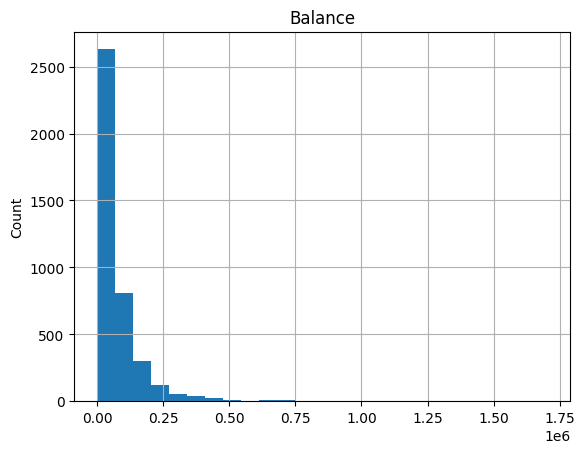

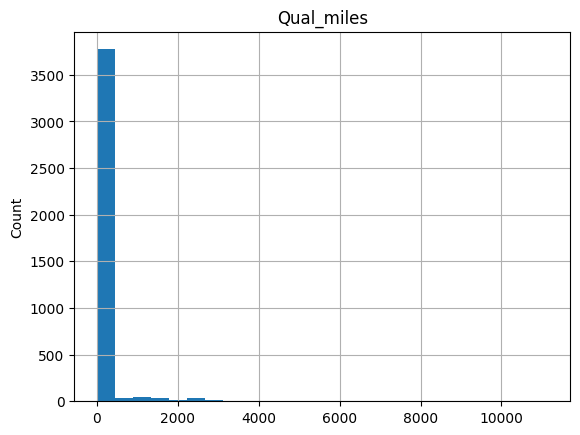

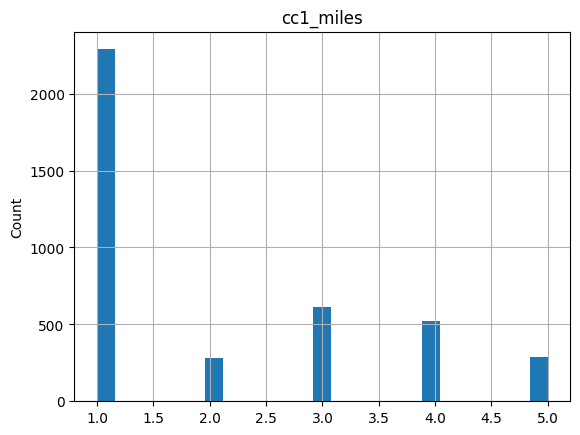

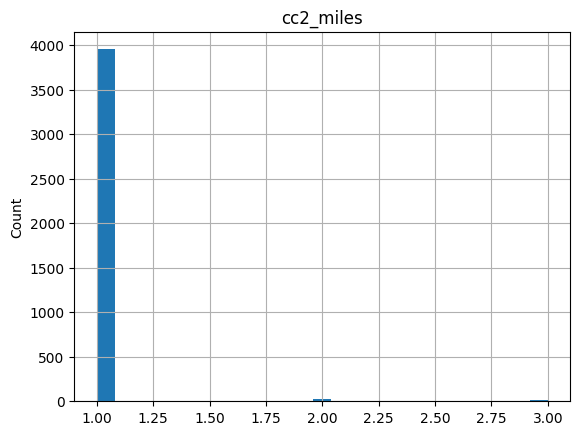

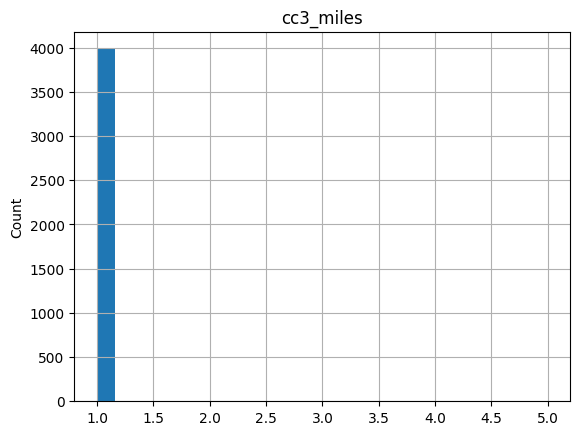

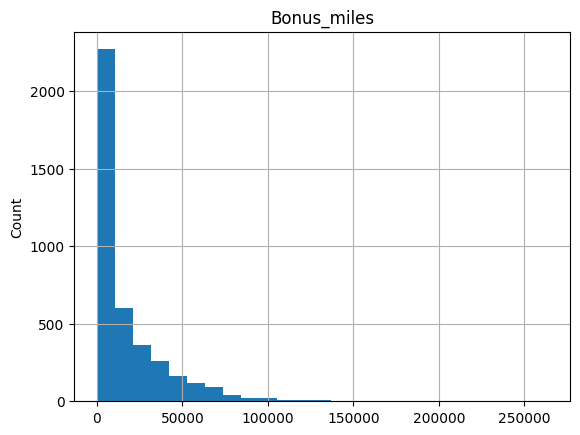

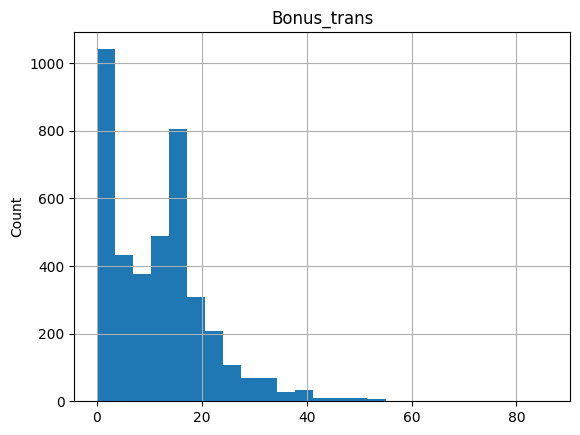

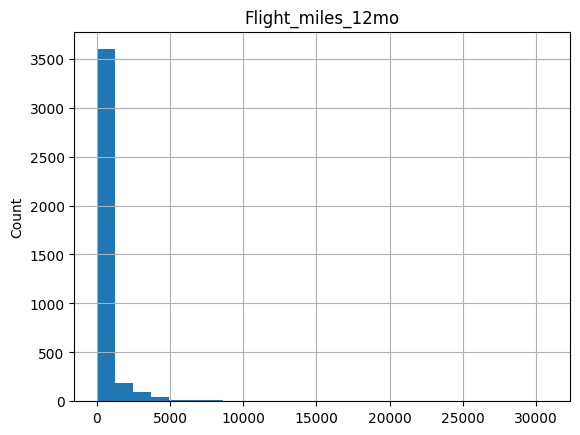

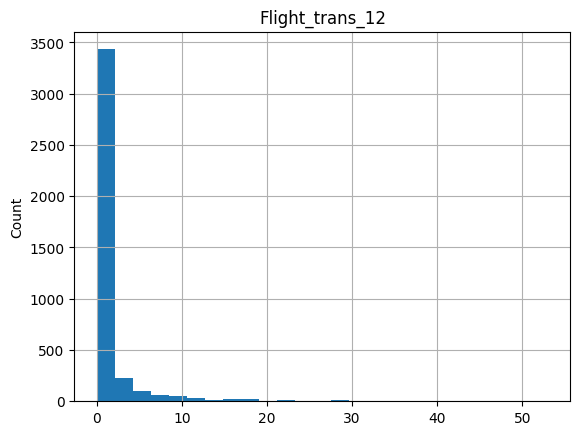

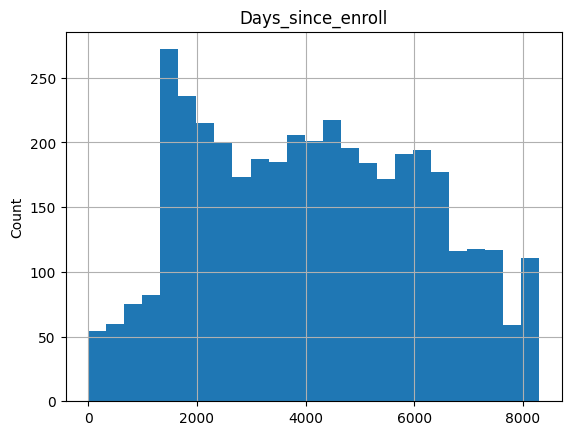

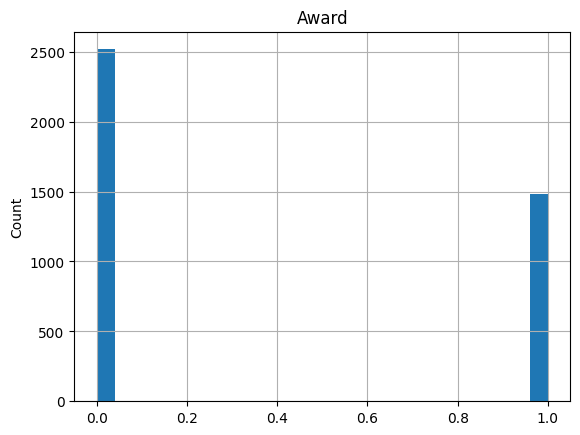

In [11]:
for feature in airline.columns:
    data=airline.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Balance


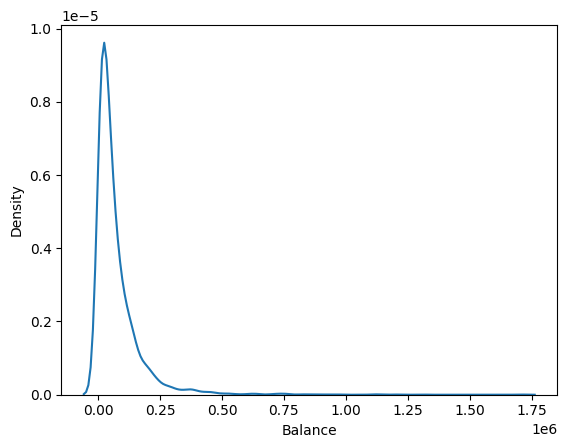

Qual_miles


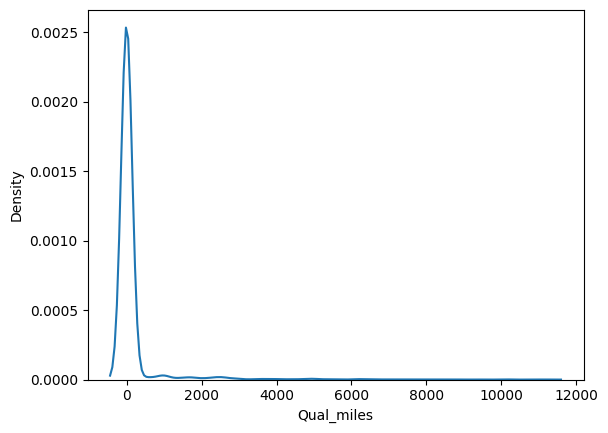

cc1_miles


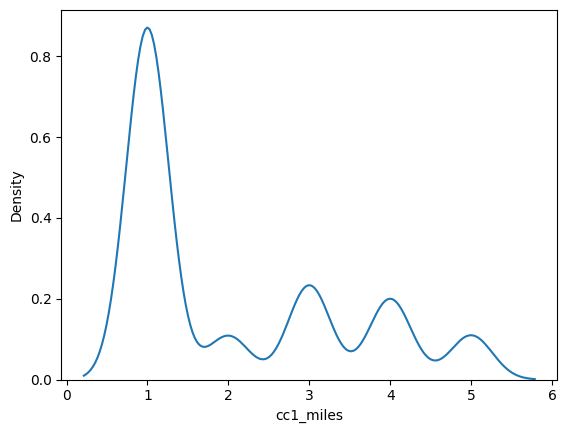

cc2_miles


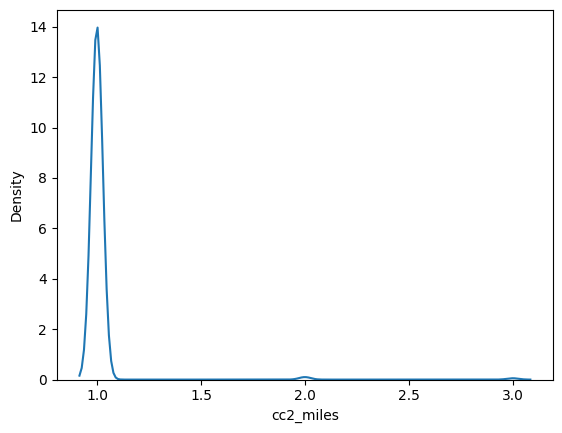

cc3_miles


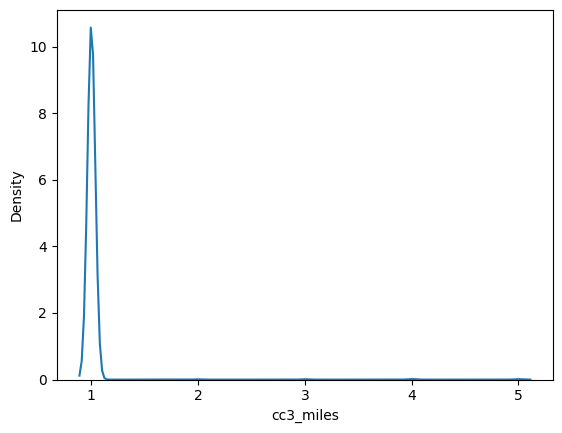

Bonus_miles


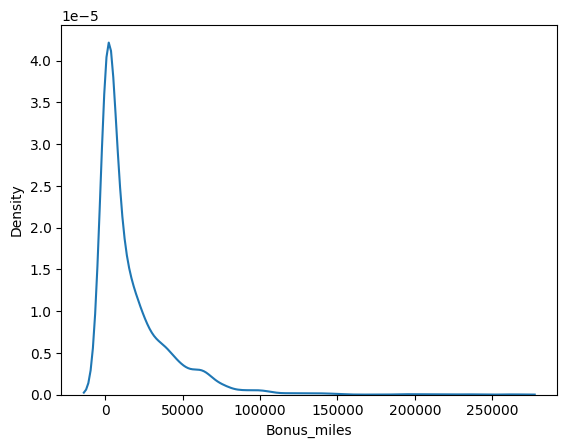

Bonus_trans


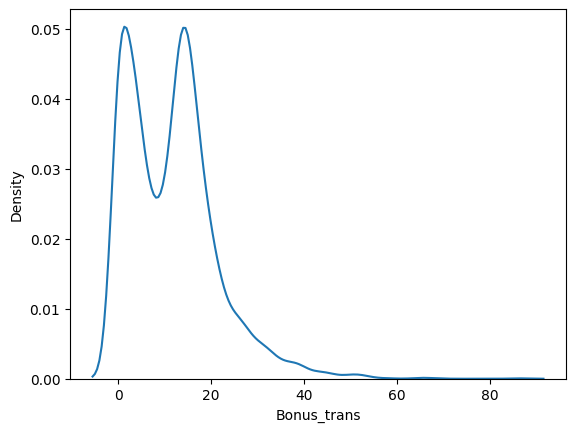

Flight_miles_12mo


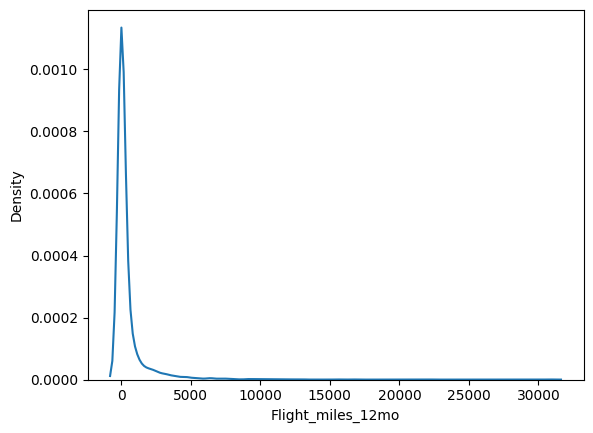

Flight_trans_12


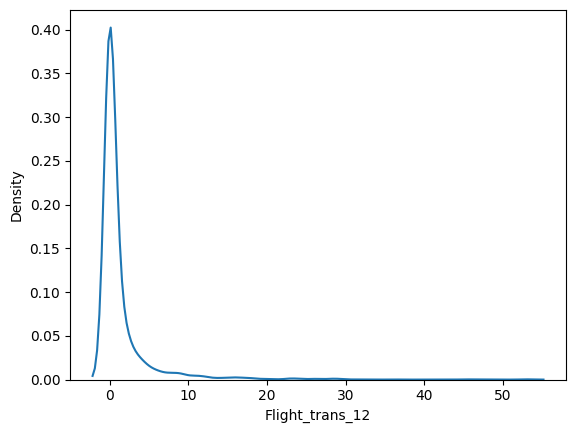

Days_since_enroll


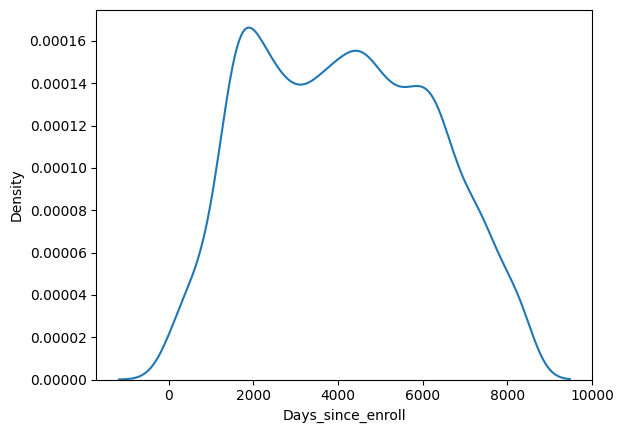

Award


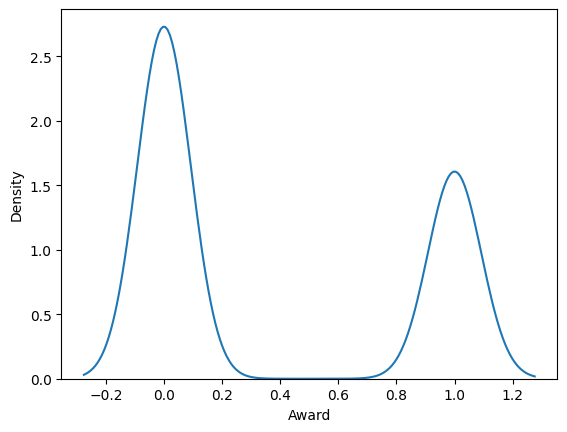

In [12]:
 # Kernel Density for every feature, singled out
import seaborn as sns
for n in data.columns:
    print(n)
    sns.kdeplot(data[n])
    plt.show()

Data Preprocessing

Standard Scaler

In [13]:
from sklearn.preprocessing import normalize

In [14]:
airline2_norm=pd.DataFrame(normalize(airline),columns=airline.columns)
airline2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3993,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3994,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3995,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3996,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


Applying different method of Hierarchical clustering

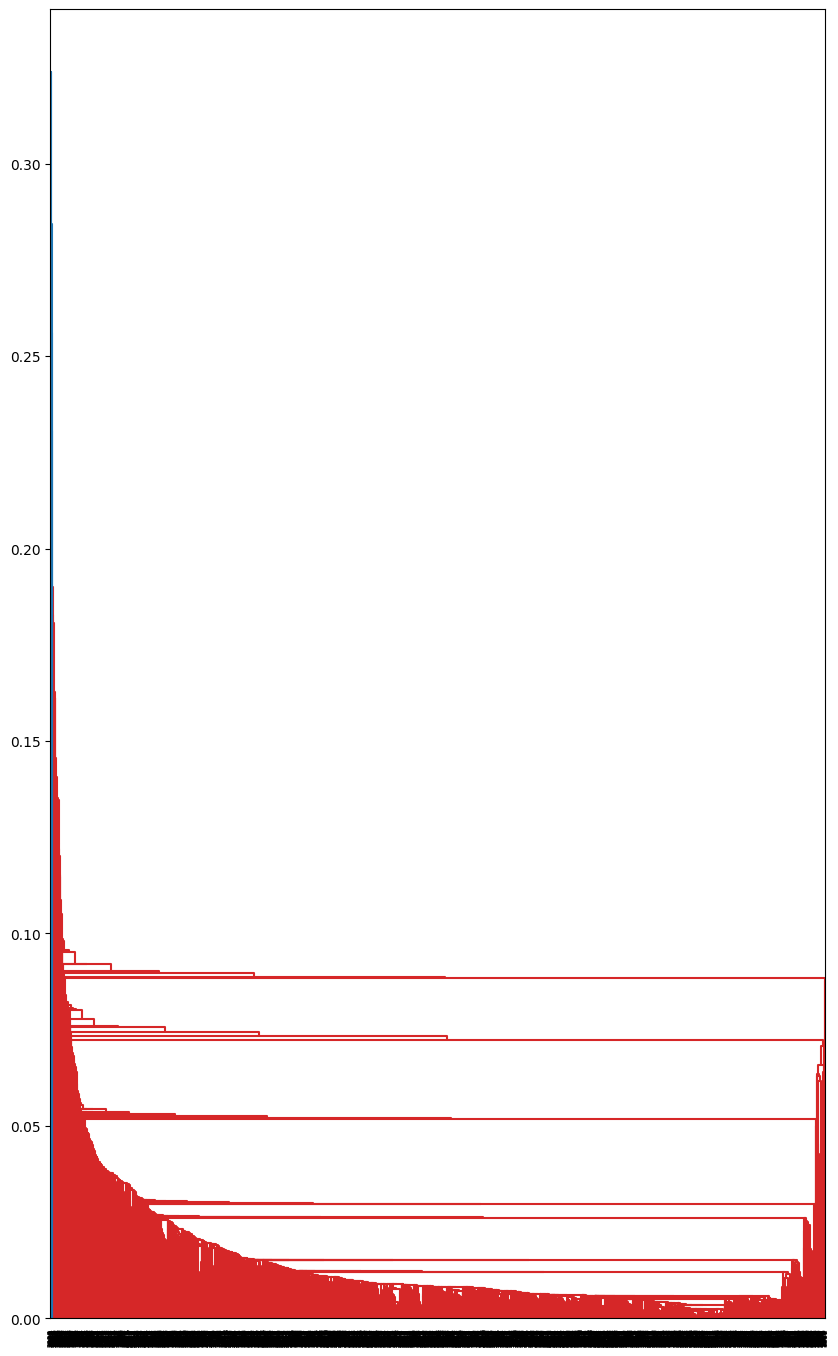

In [15]:
# Create Dendrograms
#methods=single
plt.figure(figsize=(10, 17))  
dendograms=sch.dendrogram(sch.linkage(airline2_norm,method='single'))

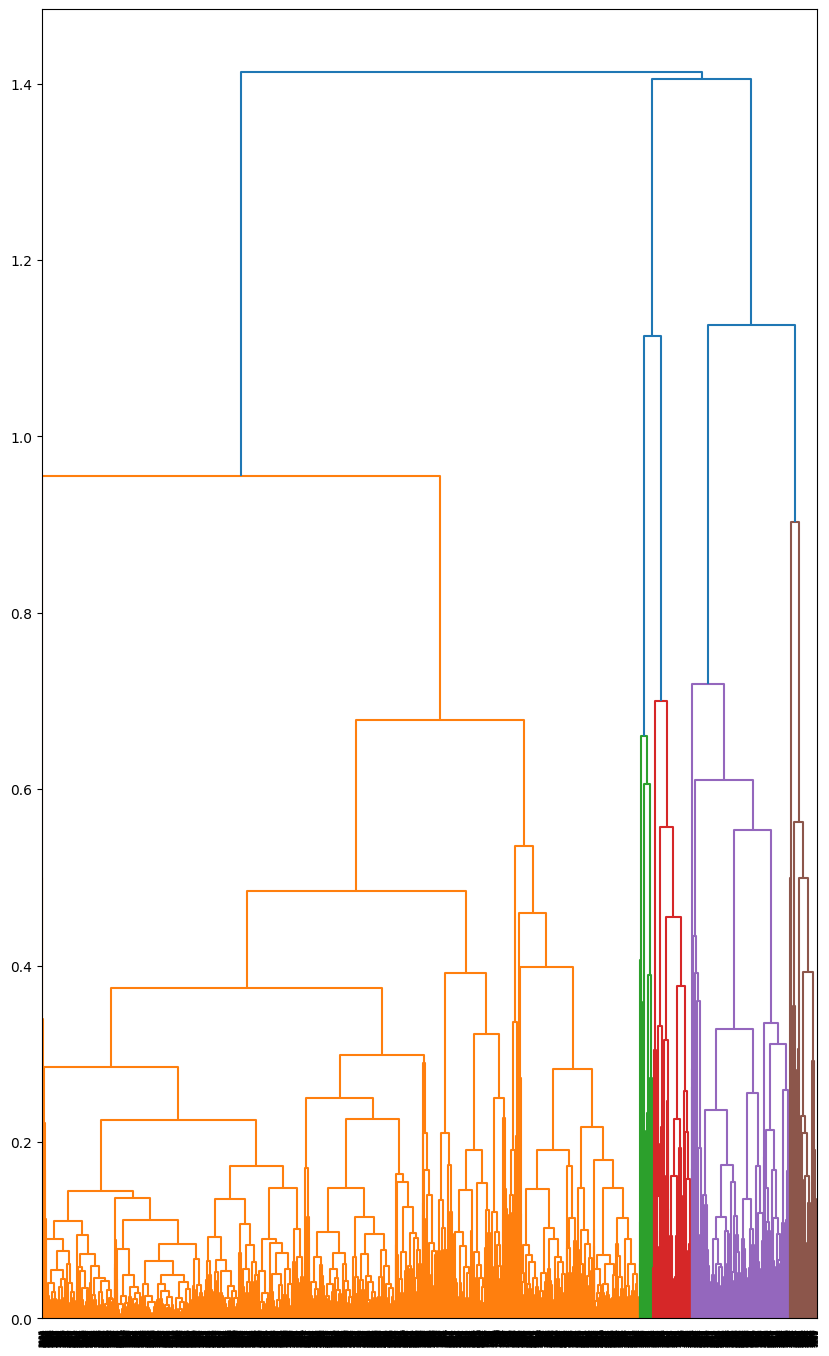

In [16]:
#methods=complete
plt.figure(figsize=(10, 17))  
dendograms=sch.dendrogram(sch.linkage(airline2_norm,method='complete'))

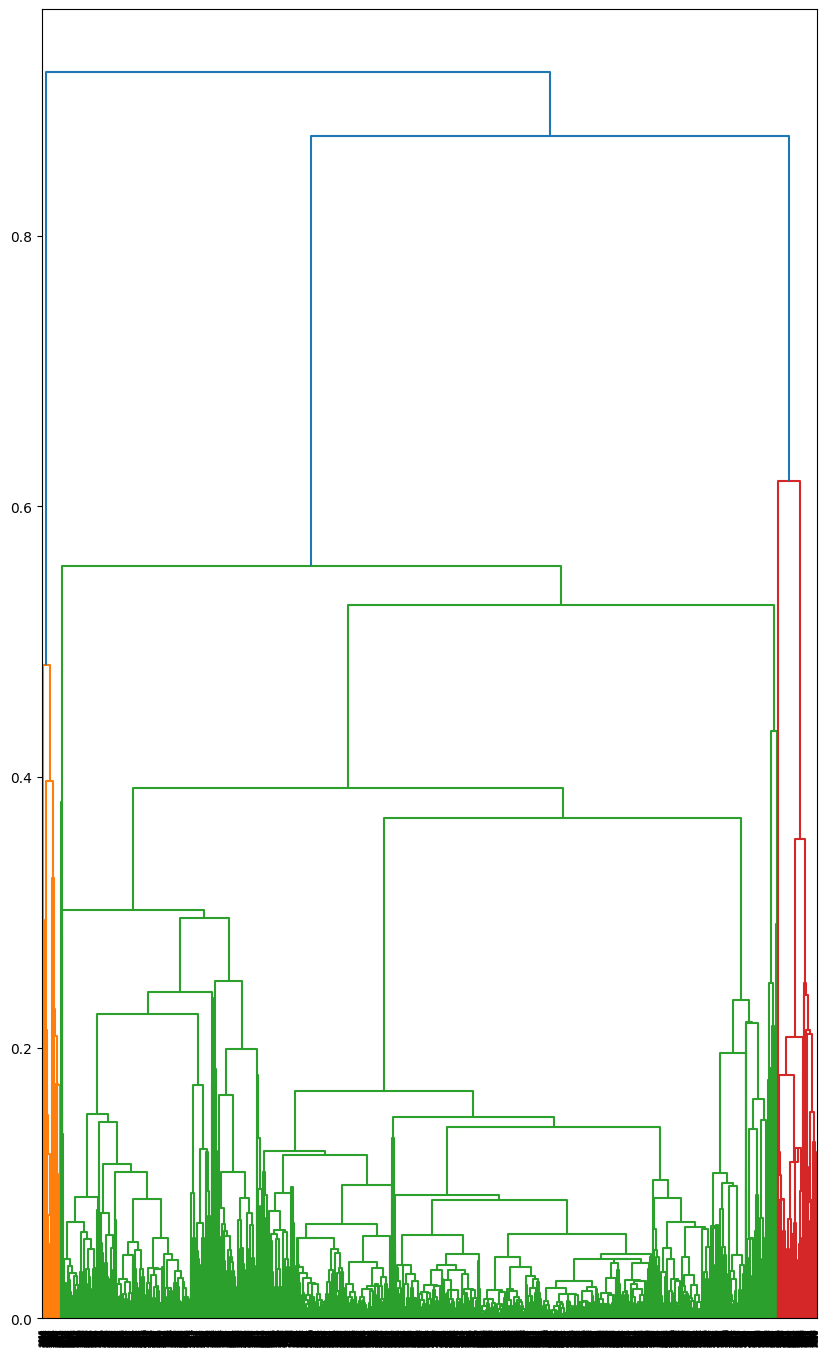

In [17]:
#methods=centroid
plt.figure(figsize=(10, 17))  
dendograms=sch.dendrogram(sch.linkage(airline2_norm,method='centroid'))

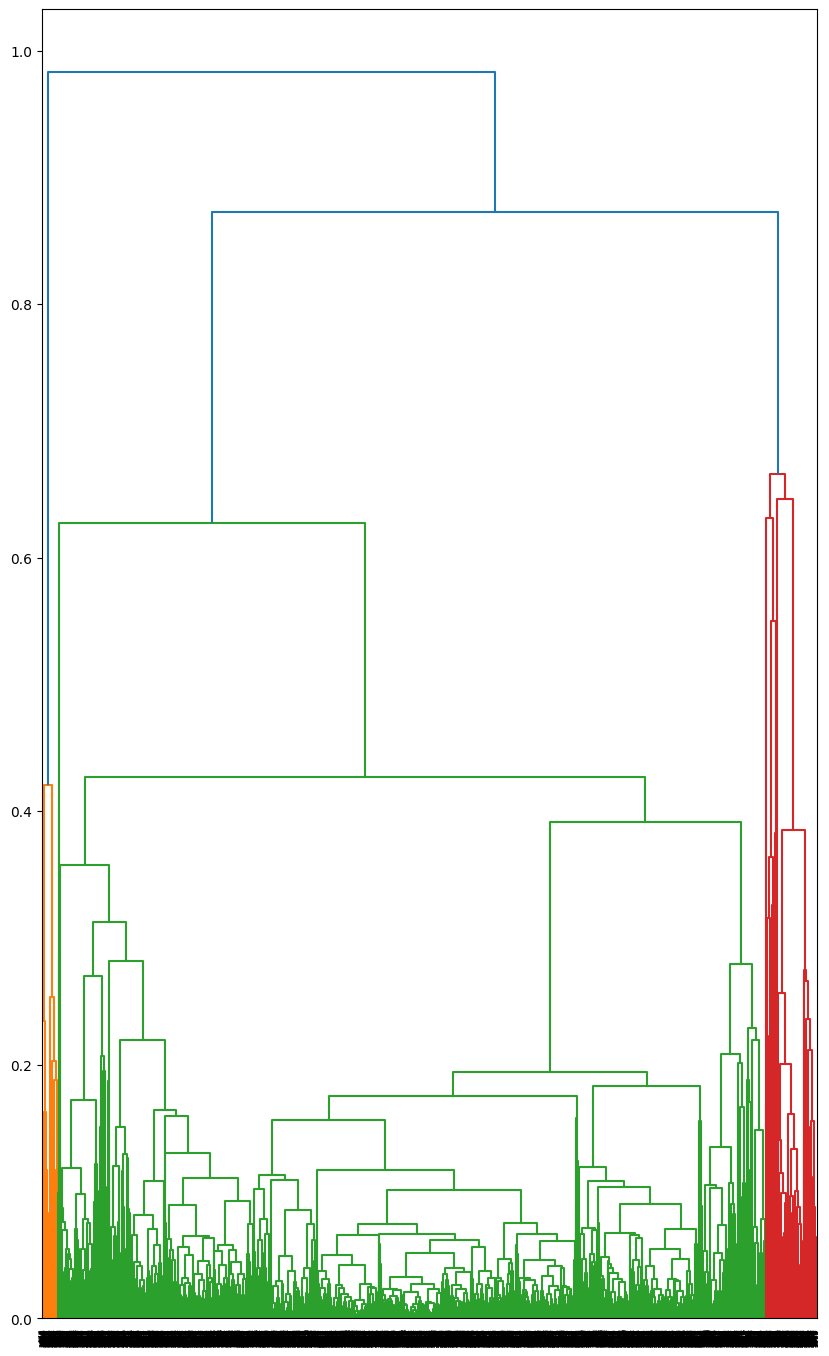

In [18]:
#methods=average
plt.figure(figsize=(10, 17))  
dendograms=sch.dendrogram(sch.linkage(airline2_norm,method='average'))

In [19]:
# Create Clusters (y)
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [20]:
# save clusters for chart
y_hc = hc.fit_predict(airline2_norm)
y_hc

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [21]:
airline['h_clusterid']=y_hc
airline.tail(30)

<ipython-input-21-20f5e8763ef1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline['h_clusterid']=y_hc


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
3969,12532,0,1,1,1,2069,9,0,0,1445,0,0
3970,52584,0,1,1,1,2500,1,0,0,1439,0,0
3971,20954,0,1,1,1,375,3,0,0,1438,0,0
3972,35185,0,2,1,1,5957,7,0,0,1439,0,0
3973,72297,0,3,1,1,16241,16,0,0,1587,1,0
3974,58387,0,3,1,1,14581,39,0,0,1435,0,0
3975,9128,0,1,1,1,0,0,0,0,1424,0,0
3976,37520,0,1,1,1,19924,6,0,0,1432,0,0
3977,9399,0,1,1,1,2125,10,0,0,1430,0,0
3978,10071,0,2,1,1,27701,16,0,0,1421,1,2


In [22]:
airline['h_clusterid'].value_counts()

0    3086
1     509
3     197
2     137
4      69
Name: h_clusterid, dtype: int64

In [23]:
airline.groupby('h_clusterid').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
h_clusterid,,,,,,,,,,,
0,85958.186325,163.835386,1.876215,1.012638,1.002916,13503.547959,11.000648,469.272197,1.402787,4043.470836,0.301685
1,49938.428291,109.797642,3.418468,1.031434,1.049116,40242.673870,18.194499,584.611002,1.722986,4072.086444,0.717092
2,15395.744526,93.620438,3.189781,1.021898,1.109489,44896.007299,17.065693,560.094891,1.708029,4517.262774,1.000000
3,7222.208122,10.177665,1.005076,1.000000,1.000000,1067.822335,3.395939,72.786802,0.213198,4885.304569,0.182741
4,1639.043478,0.000000,1.014493,1.000000,1.000000,661.681159,2.608696,42.753623,0.159420,4875.492754,0.173913


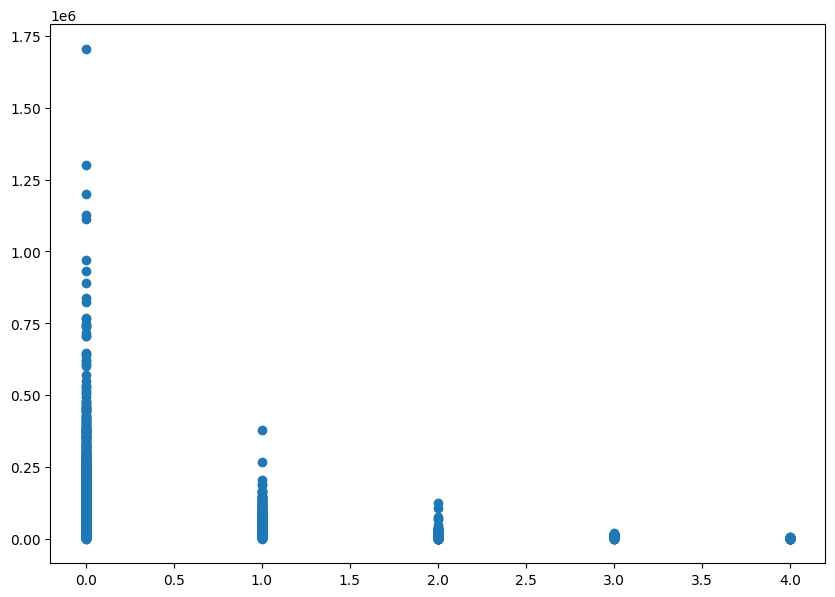

In [24]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline['h_clusterid'],airline['Balance'])

K-means

In [25]:
from sklearn.cluster import KMeans

In [26]:
airline1=airline.iloc[:,:11]
airline1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [27]:
# Normalization function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

std_df=scaler.fit_transform(airline1)

In [28]:
std_df

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

Elbow Method

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[43977.999999999985, 35402.34837621176, 30893.111681651782, 27148.665385482615, 23696.28142175274, 21086.325857898286, 19877.921691970358, 17315.91571034139, 15961.46088573225, 14725.185611004516]


Text(0, 0.5, 'WCSS(within cluster sum of squares)')

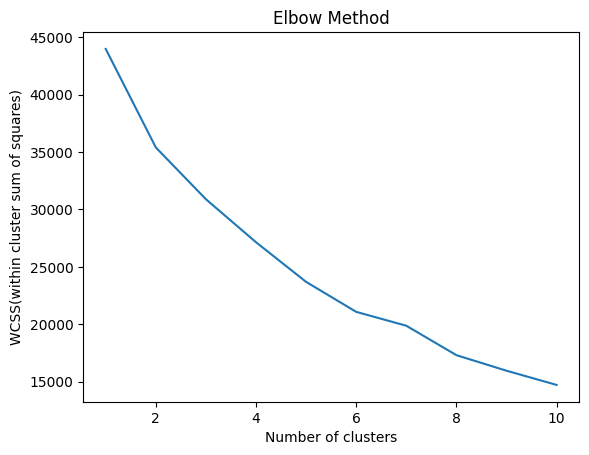

In [29]:
#WCSS (Within Cluster Sum of Squares)
wcss =[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(std_df)
  wcss.append(kmeans.inertia_)

print(wcss)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS(within cluster sum of squares)')

In [30]:
#Build Cluster Algorithm
from sklearn.cluster import  KMeans
clusters_new = KMeans(5, random_state=0)
clusters_new.fit(std_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [31]:
clusters_new.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [32]:
#assign clusters to the data set
airline1['clusters_new']= clusters_new.labels_

In [33]:
airline1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters_new
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [34]:
airline1.groupby('clusters_new').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters_new,,,,,,,,,,,
0,116739.909449,155.122047,3.704724,1.000000,1.001575,39234.801575,18.740945,334.584252,0.997638,4896.661417,0.648031
1,43869.946906,98.914970,1.225150,1.000000,1.000399,4603.542116,6.809980,196.544910,0.611178,3687.407984,0.200000
2,188752.684848,783.909091,2.181818,1.000000,1.000000,31282.351515,26.430303,5392.987879,15.612121,4684.442424,0.800000
3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


Using 5 cluster most of the columns are similar , so we reduse the cluster at 4

In [35]:
#Build Cluster Algorithm
from sklearn.cluster import  KMeans
clusters_new = KMeans(4, random_state=0)
clusters_new.fit(std_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [36]:
#assign clusters to the data set
airline1['clusters_new']= clusters_new.labels_

In [37]:
airline1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters_new
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [38]:
airline1.groupby('clusters_new').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters_new,,,,,,,,,,,
0,194350.181818,778.460606,2.145455,1.036364,1.000000,31215.236364,26.890909,5404.654545,15.763636,4703.181818,0.806061
1,44157.999608,97.017228,1.226703,1.019186,1.000392,4751.874315,6.951840,198.999608,0.620204,3701.520752,0.202428
2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,116623.795095,157.360759,3.715190,1.002373,1.001582,39451.361551,18.815665,341.890823,1.015823,4881.016614,0.651108


In [39]:
airline1['clusters_new']=airline1['clusters_new'].replace(0, 'Cluster 1')
airline1['clusters_new']=airline1['clusters_new'].replace(1, 'Cluster 2')
airline1['clusters_new']=airline1['clusters_new'].replace(2, 'Cluster 3')
airline1['clusters_new']=airline1['clusters_new'].replace(3, 'Cluster 4')
airline1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters_new
0,28143,0,1,1,1,174,1,0,0,7000,0,Cluster 2
1,19244,0,1,1,1,215,2,0,0,6968,0,Cluster 2
2,41354,0,1,1,1,4123,4,0,0,7034,0,Cluster 2
3,14776,0,1,1,1,500,1,0,0,6952,0,Cluster 2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,Cluster 4
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,Cluster 2
3995,64385,0,1,1,1,981,5,0,0,1395,1,Cluster 2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,Cluster 4
3997,54899,0,1,1,1,500,1,500,1,1401,0,Cluster 2


DBSCAN

In [40]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [41]:
airline2=airline.iloc[:,:11]
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


Insert the data value in array format

In [42]:
data=airline2.values
data

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]])

In [43]:
stscaler = StandardScaler().fit(data)
x = stscaler.transform(data)
x

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

In [44]:
dbscan=DBSCAN(eps=2.5, min_samples=21)
dbscan.fit(x)

DBSCAN(eps=2.5, min_samples=21)

In [45]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
airline2['Cluster']=pd.DataFrame(dbscan.labels_)
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0.0
1,19244,0,1,1,1,215,2,0,0,6968,0,0.0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0.0
3,14776,0,1,1,1,500,1,0,0,6952,0,0.0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0.0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0.0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0.0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0.0


In [47]:
airline2['Cluster'].value_counts()

 0.0    3789
-1.0     208
Name: Cluster, dtype: int64

In [48]:
x=metrics.silhouette_score(x,dbscan.labels_)
x

0.6318882008682283

In [49]:
def dbscan(x,eps,min_samples):
    ss=StandardScaler()
    x=ss.fit_transform(x)
    db=DBSCAN(eps=eps,min_samples=min_samples)
    db.fit(x)
    y_pred=db.fit_predict(x)
    plt.scatter(x[:,0],x[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

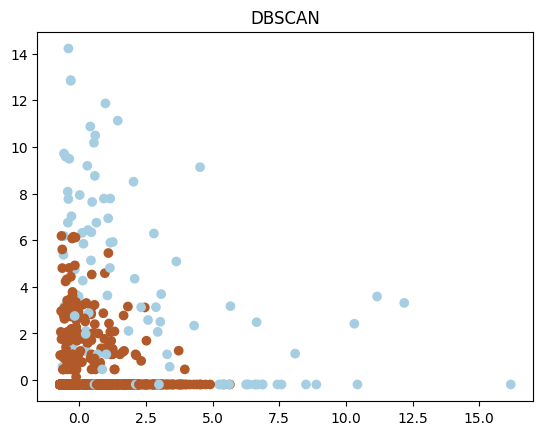

In [50]:
dbscan(data,2.5,21)